# **Crawling berita percategory**
Mengambil data berita dari website kompas.com dengan memilih 3 kategori yang akan diambil berita tersebut.

In [ ]:
# Import Library
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv

In [ ]:
def scraping_berita(halaman):
    # Daftar kategori yang dapat diisi custom sesuai kebutuhan
    kategori = ['Sports', 'Edukasi', 'Otomotif']

    a = 1

    with open('berita_kompas.csv', 'w', newline='', encoding='utf-8') as file:
        fieldnames = ['Judul_Artikel', 'Tanggal Publish', 'Content_Artikel', 'Category']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()

        # Looping untuk setiap kategori
        for kategori_terpilih in kategori:
            katakunci = kategori_terpilih

            for page in range(1, halaman + 1):
                url = f'https://indeks.kompas.com/?site={katakunci}&page={page}'
                html = req.get(url).text
                soup = bs(html, 'lxml')
                list_berita = soup.find('div', class_='latest--indeks mt2 clearfix')
                berita_list = list_berita.find_all('div', class_='article__list clearfix')

                for berita in berita_list:
                    link = berita.find('div', class_='article__list__title').find('a', class_='article__link')['href']
                    date = berita.find('div', class_='article__list__info').find('div', class_='article__date').text
                    headline = berita.find('div', class_='article__list__title').find('a', class_='article__link').text

                    if (katakunci == 'Sports'):
                      category = 'Sports'
                    elif (katakunci == 'Edukasi'):
                      category = 'Edukasi'
                    elif (katakunci == 'Otomotif'):
                      category = 'Otomotif'

                    ge_berita = req.get(link).text
                    sop_berita = bs(ge_berita, 'lxml')
                    content_elem = sop_berita.find_all('div', class_='read__content')
                    content_list = [p.text for elem in content_elem for p in elem.find_all('p')]
                    artikel = '\n'.join(content_list).replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '').replace('\n', ' ').strip()

                    print(f'data berhasil diambil[{a}] > {headline[0:10]}')
                    a += 1

                    writer.writerow({'Judul_Artikel': headline, 'Tanggal Publish': date, 'Content_Artikel': artikel, 'Category': category})

# pemanggilan fungsi dengan jumlah halaman yang di scraping
scraping_berita(18)

## Preprocessing

In [ ]:
# Koneksi ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Membaca dataset
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ppw/ppw_implementasi/tugas ppw/dataset/berita_kompas.csv')
data

,Judul_Artikel,Tanggal Publish,Content_Artikel,Category
0,Jadwal Timnas Indonesia Malam Ini di Piala Dun...,"13/11/2023, 14:14 WIB",KOMPAS.com - Jadwal timnas Indonesia malam ini...,Sports
1,Eks Pelatih Garuda soal 2 Pemain Keturunan di ...,"13/11/2023, 13:20 WIB",KOMPAS.com - Keberadaan dua pemain keturunan d...,Sports
2,Cerita Jurnalis Mali di Piala Dunia U17: Dari ...,"13/11/2023, 12:15 WIB",KOMPAS.com - Dua jurnalis Mali hadir langsung ...,Sports
3,"Piala Dunia U17 2023, Jurnalis Ekuador Bicara ...","13/11/2023, 11:30 WIB","Laporan langsung jurnalis Kompas.com, Ahmad Zi...",Sports
4,5 MVP Turnamen Bold Battle of Legends 2023 Jal...,"13/11/2023, 11:03 WIB",KOMPAS.com - Rangkaian turnamen esports Bold B...,Sports
...,...,...,...,...
805,Penunggak Pajak Kendaraan Diumumkan di SPBU Be...,"08/11/2023, 06:22 WIB","JAKARTA, KOMPAS.com - Corporate Secretary Pert...",Otomotif
806,[POPULER OTOMOTIF] Intip Bodi Bus Langka Milik...,"08/11/2023, 06:02 WIB","JAKARTA, KOMPAS.com - Seiring perubahan zaman ...",Otomotif
807,"Subaru DriveFest di Batam, Tutup Perayaan 50 T...","07/11/2023, 20:21 WIB","JAKARTA, KOMPAS.com - Subaru Indonesia menggel...",Otomotif
808,"Ada Balap Resmi, Bamsoet Minta Pengguna Moge T...","07/11/2023, 20:11 WIB","JAKARTA, KOMPAS.com - Salah satu grup terbesar...",Otomotif


In [ ]:
# Hitung jumlah kelas
kelas = data['Category'].value_counts()
kelas

Sports      270
Edukasi     270
Otomotif    270
Name: Category, dtype: int64

In [ ]:
# Cek data kosong
data.isnull().sum()

Judul_Artikel      0
Tanggal Publish    0
Content_Artikel    0
Category           0
dtype: int64

In [ ]:
# Cek data duplicate
data.duplicated().sum()

0

### Clean data
Proses cleaning data digunakan untuk menghapus karakter tertentu dimana fungsi cleaning digunakan untuk membersihkan teks dalam kolom ‘Content_Artikel’. Ini menghapus karakter-karakter yang tidak relevan seperti tanda baca dan mengubah teks menjadi daftar kata-kata.

In [ ]:
import re
data['clean_content'] = data['Content_Artikel'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()
data

,Judul_Artikel,Tanggal Publish,Content_Artikel,Category,clean_content
0,Jadwal Timnas Indonesia Malam Ini di Piala Dun...,"13/11/2023, 14:14 WIB",KOMPAS.com - Jadwal timnas Indonesia malam ini...,Sports,kompas.com jadwal timnas indonesia malam ini ...
1,Eks Pelatih Garuda soal 2 Pemain Keturunan di ...,"13/11/2023, 13:20 WIB",KOMPAS.com - Keberadaan dua pemain keturunan d...,Sports,kompas.com keberadaan dua pemain keturunan di...
2,Cerita Jurnalis Mali di Piala Dunia U17: Dari ...,"13/11/2023, 12:15 WIB",KOMPAS.com - Dua jurnalis Mali hadir langsung ...,Sports,kompas.com dua jurnalis mali hadir langsung k...
3,"Piala Dunia U17 2023, Jurnalis Ekuador Bicara ...","13/11/2023, 11:30 WIB","Laporan langsung jurnalis Kompas.com, Ahmad Zi...",Sports,"laporan langsung jurnalis kompas.com, ahmad zi..."
4,5 MVP Turnamen Bold Battle of Legends 2023 Jal...,"13/11/2023, 11:03 WIB",KOMPAS.com - Rangkaian turnamen esports Bold B...,Sports,kompas.com rangkaian turnamen esports bold ba...
...,...,...,...,...,...
805,Penunggak Pajak Kendaraan Diumumkan di SPBU Be...,"08/11/2023, 06:22 WIB","JAKARTA, KOMPAS.com - Corporate Secretary Pert...",Otomotif,"jakarta, kompas.com corporate secretary perta..."
806,[POPULER OTOMOTIF] Intip Bodi Bus Langka Milik...,"08/11/2023, 06:02 WIB","JAKARTA, KOMPAS.com - Seiring perubahan zaman ...",Otomotif,"jakarta, kompas.com seiring perubahan zaman d..."
807,"Subaru DriveFest di Batam, Tutup Perayaan 50 T...","07/11/2023, 20:21 WIB","JAKARTA, KOMPAS.com - Subaru Indonesia menggel...",Otomotif,"jakarta, kompas.com subaru indonesia menggela..."
808,"Ada Balap Resmi, Bamsoet Minta Pengguna Moge T...","07/11/2023, 20:11 WIB","JAKARTA, KOMPAS.com - Salah satu grup terbesar...",Otomotif,"jakarta, kompas.com salah satu grup terbesar ..."


### Tokenizing
Fungsi tokenizer digunakan untuk melakukan tokenisasi dan juga proses case folding pada teks yang telah dibersihkan. Ini mengubah teks menjadi token-token kata.

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data["tokenizing"] = data['clean_content'].apply(sent_tokenize)
data

,Judul_Artikel,Tanggal Publish,Content_Artikel,Category,clean_content,tokenizing
0,Jadwal Timnas Indonesia Malam Ini di Piala Dun...,"13/11/2023, 14:14 WIB",KOMPAS.com - Jadwal timnas Indonesia malam ini...,Sports,kompas.com jadwal timnas indonesia malam ini ...,[kompas.com jadwal timnas indonesia malam ini...
1,Eks Pelatih Garuda soal 2 Pemain Keturunan di ...,"13/11/2023, 13:20 WIB",KOMPAS.com - Keberadaan dua pemain keturunan d...,Sports,kompas.com keberadaan dua pemain keturunan di...,[kompas.com keberadaan dua pemain keturunan d...
2,Cerita Jurnalis Mali di Piala Dunia U17: Dari ...,"13/11/2023, 12:15 WIB",KOMPAS.com - Dua jurnalis Mali hadir langsung ...,Sports,kompas.com dua jurnalis mali hadir langsung k...,[kompas.com dua jurnalis mali hadir langsung ...
3,"Piala Dunia U17 2023, Jurnalis Ekuador Bicara ...","13/11/2023, 11:30 WIB","Laporan langsung jurnalis Kompas.com, Ahmad Zi...",Sports,"laporan langsung jurnalis kompas.com, ahmad zi...","[laporan langsung jurnalis kompas.com, ahmad z..."
4,5 MVP Turnamen Bold Battle of Legends 2023 Jal...,"13/11/2023, 11:03 WIB",KOMPAS.com - Rangkaian turnamen esports Bold B...,Sports,kompas.com rangkaian turnamen esports bold ba...,[kompas.com rangkaian turnamen esports bold b...
...,...,...,...,...,...,...
805,Penunggak Pajak Kendaraan Diumumkan di SPBU Be...,"08/11/2023, 06:22 WIB","JAKARTA, KOMPAS.com - Corporate Secretary Pert...",Otomotif,"jakarta, kompas.com corporate secretary perta...","[jakarta, kompas.com corporate secretary pert..."
806,[POPULER OTOMOTIF] Intip Bodi Bus Langka Milik...,"08/11/2023, 06:02 WIB","JAKARTA, KOMPAS.com - Seiring perubahan zaman ...",Otomotif,"jakarta, kompas.com seiring perubahan zaman d...","[jakarta, kompas.com seiring perubahan zaman ..."
807,"Subaru DriveFest di Batam, Tutup Perayaan 50 T...","07/11/2023, 20:21 WIB","JAKARTA, KOMPAS.com - Subaru Indonesia menggel...",Otomotif,"jakarta, kompas.com subaru indonesia menggela...","[jakarta, kompas.com subaru indonesia menggel..."
808,"Ada Balap Resmi, Bamsoet Minta Pengguna Moge T...","07/11/2023, 20:11 WIB","JAKARTA, KOMPAS.com - Salah satu grup terbesar...",Otomotif,"jakarta, kompas.com salah satu grup terbesar ...","[jakarta, kompas.com salah satu grup terbesar..."


## Ekstraksi Fitur

### TF IDF
Term Frequency-Inverse Document Frequency (TF IDF) adalah metode yang digunakan dalam pemrosesan bahasa alami untuk mengevaluasi pentingnya suatu kata dalam sebuah dokumen atau kumpulan dokumen dalam konteks korpus yang lebih besar.

In [ ]:
# Inisialisasi TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_results = []
set_len_doc = data['tokenizing'][:]
for i in range(len(set_len_doc)): #perulangan setiap artikel/dokumen

  tfidf_vectorizer = TfidfVectorizer()  #inisialisasi tfidf
  tfidf_matrix = tfidf_vectorizer.fit_transform(data['tokenizing'][i]) #menjadikan tfidf setiap dokumen
  tfidf_results.append(tfidf_matrix) #memasukkan hasil matrix tfidf ke tfidf_results

In [ ]:
# Menampilkan data TFIDF
for idoc in range(len(tfidf_results)):
  print(f'========== Document ke-{idoc} ==========')

  arr_tfidf_results = tfidf_results[idoc].toarray() #menjadikan hasil tfidf yang format sparesematrix menjadi array

  index = 0
  for hasils in arr_tfidf_results:
    print(f'Hasil Tfidf Kalimat ke-{index+1} = {list(hasils)}')
    index+=1
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

### Cosine Similarity
Merupakan metode untuk mengukur seberapa mirip dua vektor dalam ruang berdimensi banyak. Biasanya, cosine similarity digunakan dalam pemrosesan bahasa alami dan pengelompokan dokumen untuk menentukan seberapa serupa atau berbeda dua dokumen berdasarkan representasi vektor mereka.

In [ ]:
# Import Library
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.shortest_paths import weighted

In [ ]:
cos_sim_result = [] #untuk menyimpan hasil cosine sim akhir
graf_result = [] #untuk menyimpan hasil graf akhir
treshold = 0.08 #inisialisasi treshold

for i_doc in range(len(tfidf_results)):
  # print(f'========= Document ke-{i_doc} ==========')

  cos_sim_now = []
  graf_now = nx.DiGraph()
  cos_sim = cosine_similarity(tfidf_results[i_doc]) #menjadikan tfidf ke cosine

  for i_hasil in range(len(cos_sim)): #inisialisasi indeks awal perulangan dari setiap hasil cosine
    arr_cosim = []

    for j_hasil in range(i_hasil+1,len(cos_sim)): #inisialisasi indeks kedua perulangan dari setiap hasil cosine
      if cos_sim[i_hasil][j_hasil] > treshold: #cek apakah cosim dari kalimat 1 dan 2 lebih dari treshold?
        # print(f'Similairty kalimat ke - {i_hasil} : {j_hasil} = {cos_sim[i_hasil][j_hasil]}')

        arr_cosim.append([i_hasil,j_hasil,cos_sim[i_hasil][j_hasil]]) #menyimpan nilai indeks awal, indeks awal+1, hasil cosim
        graf_now.add_edge(i_hasil,j_hasil,weight=cos_sim[i_hasil][j_hasil]) #menyimpan nilai indeks awal, indeks awal+1, bobot=hasil cosim

    cos_sim_now.append(arr_cosim)
    # graf_now.append(graf_current)
  cos_sim_result.append(cos_sim_now)
  graf_result.append(graf_now)
  # print('\n')

In [ ]:
# menampilkan hasil cosine simmilarity
for i in range(len(cos_sim_result)):
  print(f'============= Document ke - {i} ==============')
  for j in range(len(cos_sim_result[i])):
    for idx1,idx2,hasil in cos_sim_result[i][j]:
      print(f'Cosine Similarity Kalimat {idx1} : {idx2} = {hasil}')
  print('\n')

Output streaming akan dipotong hingga 5000 baris terakhir.
Cosine Similarity Kalimat 5 : 15 = 0.09475622205848991
Cosine Similarity Kalimat 5 : 16 = 0.08869115483817205
Cosine Similarity Kalimat 5 : 18 = 0.20796882604926073
Cosine Similarity Kalimat 6 : 7 = 0.09847167920843583
Cosine Similarity Kalimat 6 : 9 = 0.2892227658444999
Cosine Similarity Kalimat 6 : 11 = 0.323563934964821
Cosine Similarity Kalimat 6 : 18 = 0.08180365426412325
Cosine Similarity Kalimat 7 : 14 = 0.11839449849742717
Cosine Similarity Kalimat 7 : 19 = 0.11357843347598005
Cosine Similarity Kalimat 8 : 15 = 0.2927407813865731
Cosine Similarity Kalimat 8 : 16 = 0.1230130965305304
Cosine Similarity Kalimat 8 : 18 = 0.1787484068268734
Cosine Similarity Kalimat 9 : 10 = 0.1411017915850609
Cosine Similarity Kalimat 9 : 11 = 0.31896326633170685
Cosine Similarity Kalimat 9 : 18 = 0.08064051008896053
Cosine Similarity Kalimat 11 : 18 = 0.09021544581999788
Cosine Similarity Kalimat 12 : 14 = 0.12685734131830856
Cosine Simila

### Closenens Centrality
Merupakan salah satu ukuran centralitas dalam jaringan yang mengukur seberapa dekat suatu simpul (node) dalam jaringan terhadap simpul-simpul lainnya. Hal ini mengukur seberapa cepat atau seberapa mudah sebuah simpul dapat diakses oleh simpul lain dalam jaringan.

In [ ]:
# Cuma cek Hitung closeness centrality pada index 0
closeness_centrality = nx.closeness_centrality(graf_result[0])
closeness_centrality

{0: 0.0,
 2: 0.16666666666666666,
 3: 0.5,
 5: 0.5333333333333333,
 1: 0.0,
 6: 0.2222222222222222,
 4: 0.38095238095238093}

In [ ]:
for i in range(len(graf_result)):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  # pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  # labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # # Menentukan ukuran canvas
  # plt.figure(figsize=(30, 20))

  # # Menggambar graf dengan ukuran canvas yang diperbesar
  # nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  # nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  # # plt.show()


  print('\n')

Output streaming akan dipotong hingga 5000 baris terakhir.
Closenes Centrality Node 8 = 0.6805555555555556
Closenes Centrality Node 2 = 0.14814814814814814
Closenes Centrality Node 5 = 0.462962962962963
Closenes Centrality Node 6 = 0.4444444444444444
Closenes Centrality Node 9 = 0.39999999999999997
Closenes Centrality Node 10 = 0.5470085470085471


========= document ke-492 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.1111111111111111
Closenes Centrality Node 2 = 0.2222222222222222
Closenes Centrality Node 3 = 0.3333333333333333
Closenes Centrality Node 4 = 0.1111111111111111
Closenes Centrality Node 5 = 0.35555555555555557
Closenes Centrality Node 6 = 0.308641975308642
Closenes Centrality Node 9 = 0.39999999999999997
Closenes Centrality Node 8 = 0.5444444444444444
Closenes Centrality Node 7 = 0.26666666666666666


========= document ke-493 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.1
Closenes Centrality Node 2 = 0

### Membuat Graph setiap dokument

========= document ke-0 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 2 = 0.16666666666666666
Closenes Centrality Node 3 = 0.5
Closenes Centrality Node 5 = 0.5333333333333333
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 6 = 0.2222222222222222
Closenes Centrality Node 4 = 0.38095238095238093


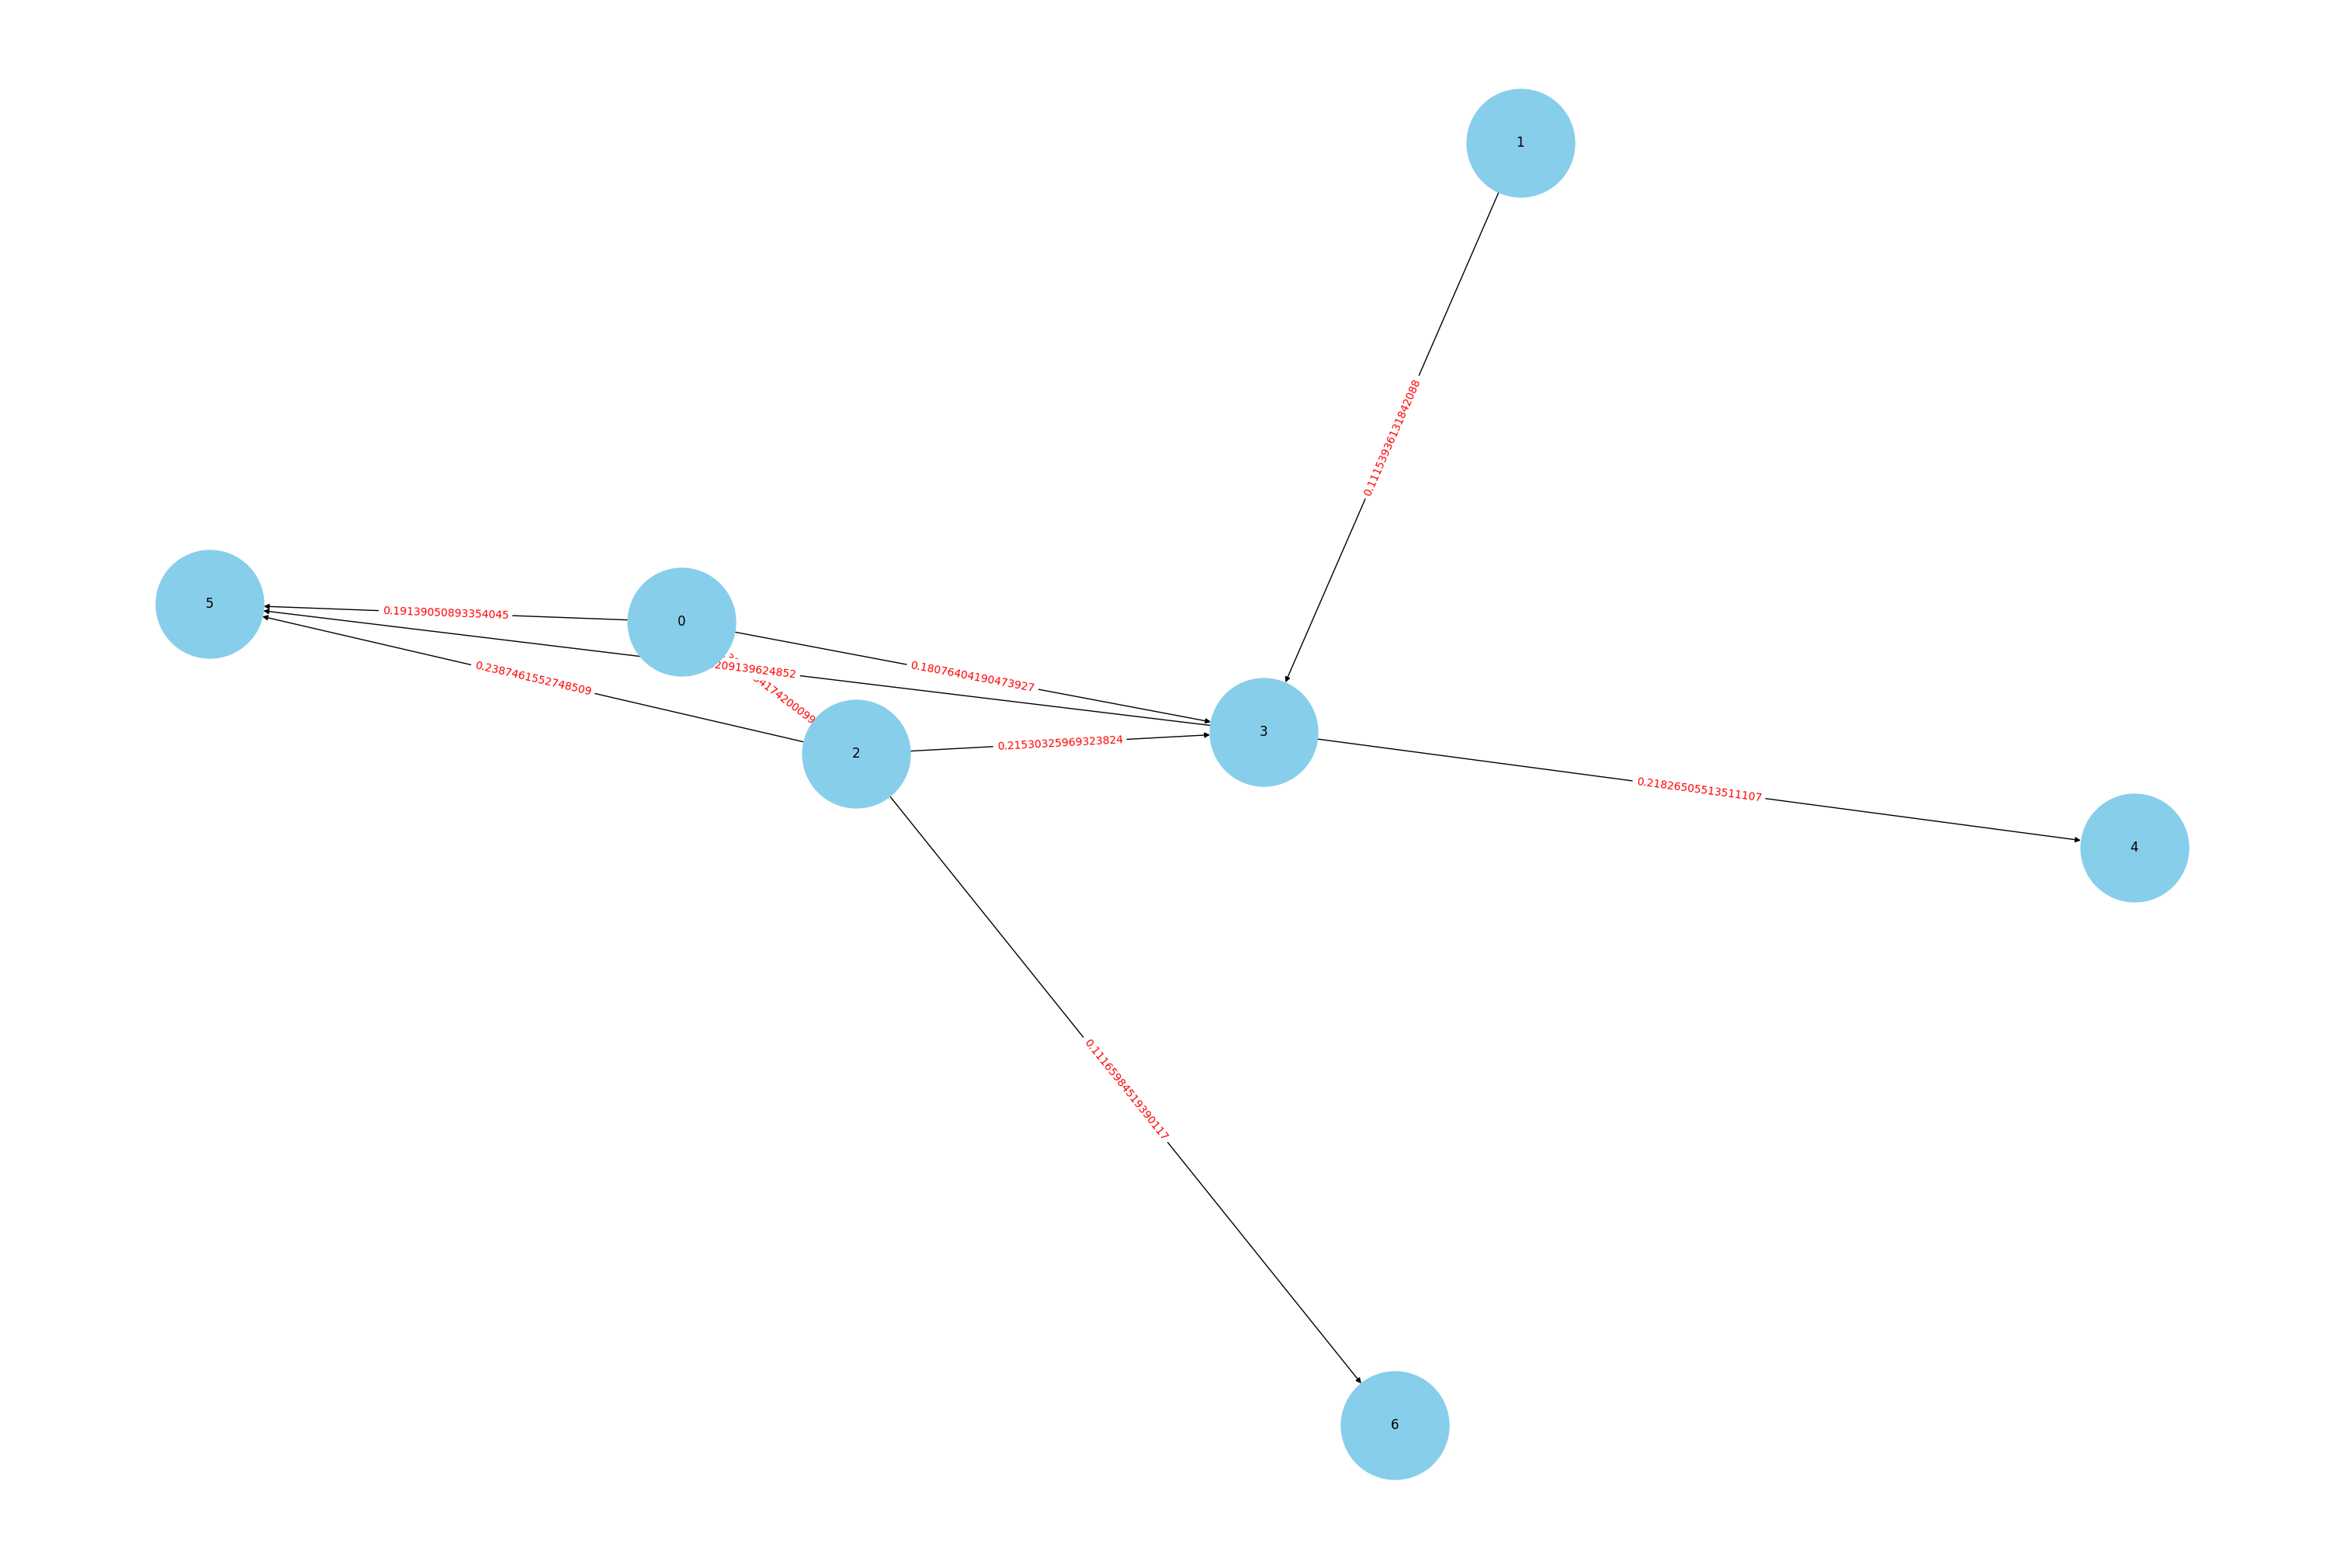



========= document ke-1 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.09090909090909091
Closenes Centrality Node 2 = 0.18181818181818182
Closenes Centrality Node 3 = 0.2727272727272727
Closenes Centrality Node 4 = 0.29090909090909095
Closenes Centrality Node 5 = 0.36363636363636365
Closenes Centrality Node 6 = 0.45454545454545453
Closenes Centrality Node 8 = 0.494949494949495
Closenes Centrality Node 9 = 0.46753246753246747
Closenes Centrality Node 10 = 0.34265734265734266
Closenes Centrality Node 11 = 0.4475524475524476
Closenes Centrality Node 7 = 0.29752066115702475


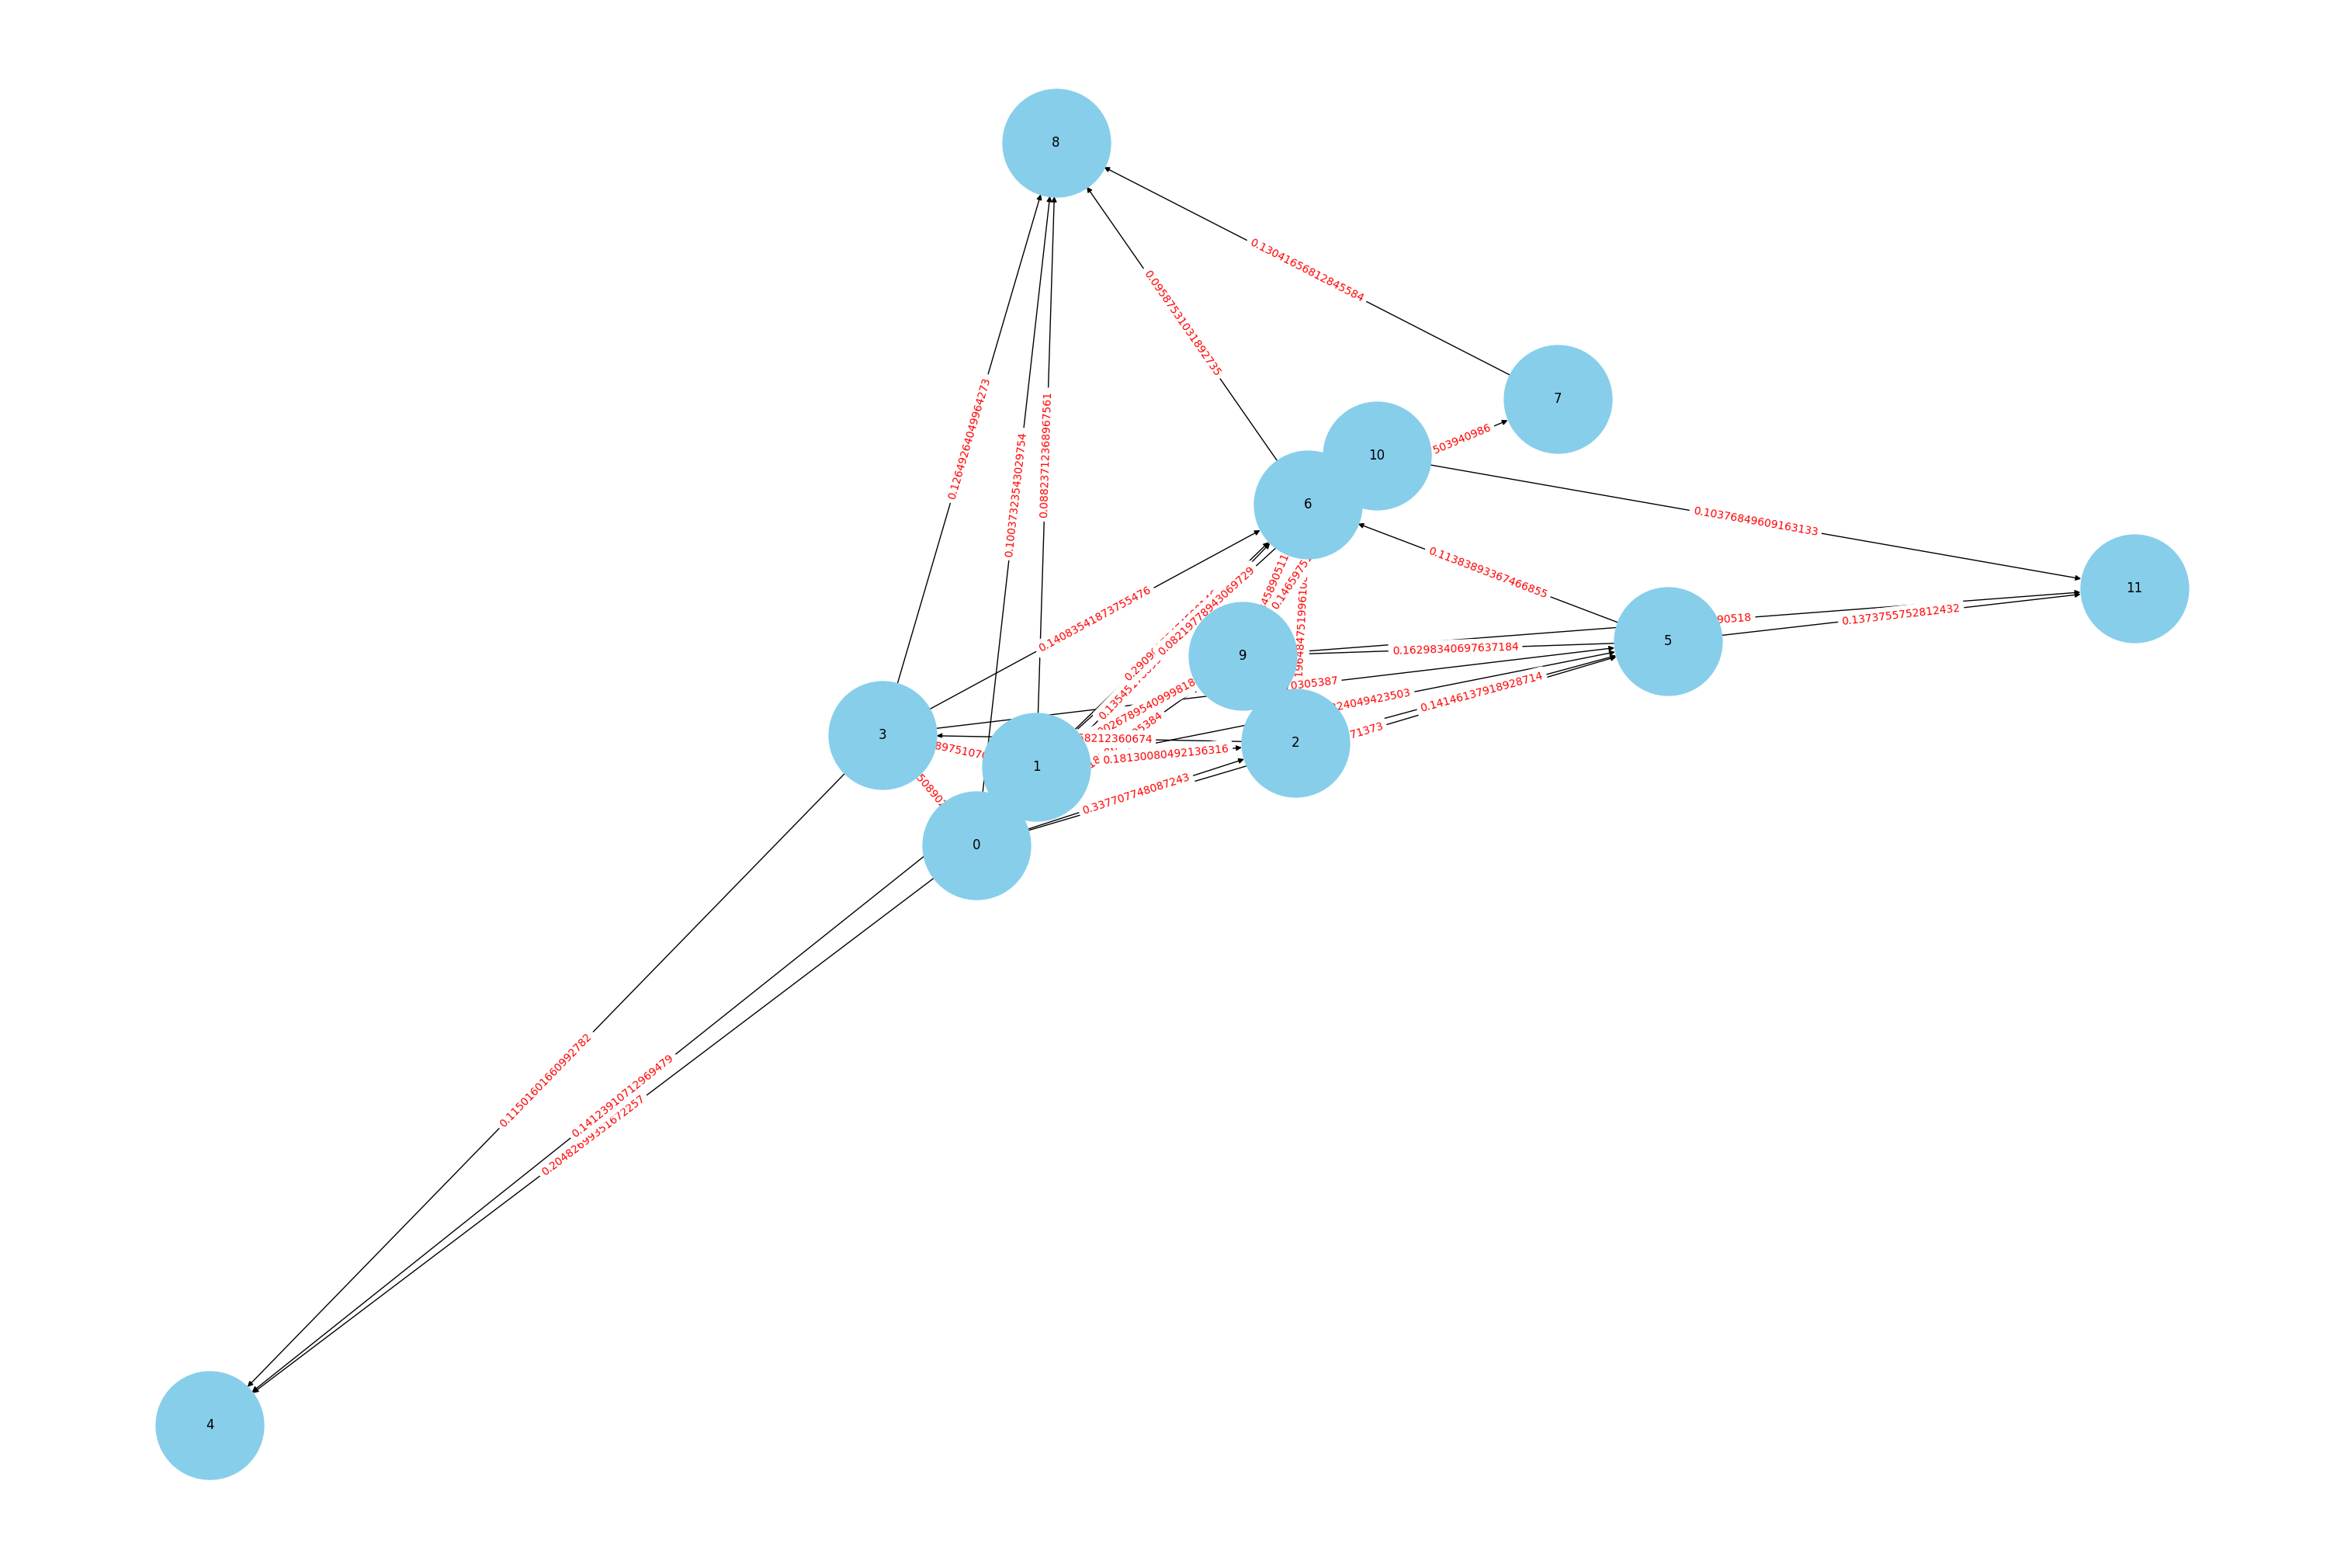



========= document ke-2 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.1111111111111111
Closenes Centrality Node 2 = 0.1111111111111111
Closenes Centrality Node 4 = 0.3333333333333333
Closenes Centrality Node 5 = 0.3333333333333333
Closenes Centrality Node 9 = 0.35555555555555557
Closenes Centrality Node 8 = 0.494949494949495
Closenes Centrality Node 3 = 0.0
Closenes Centrality Node 7 = 0.3472222222222222
Closenes Centrality Node 6 = 0.25396825396825395


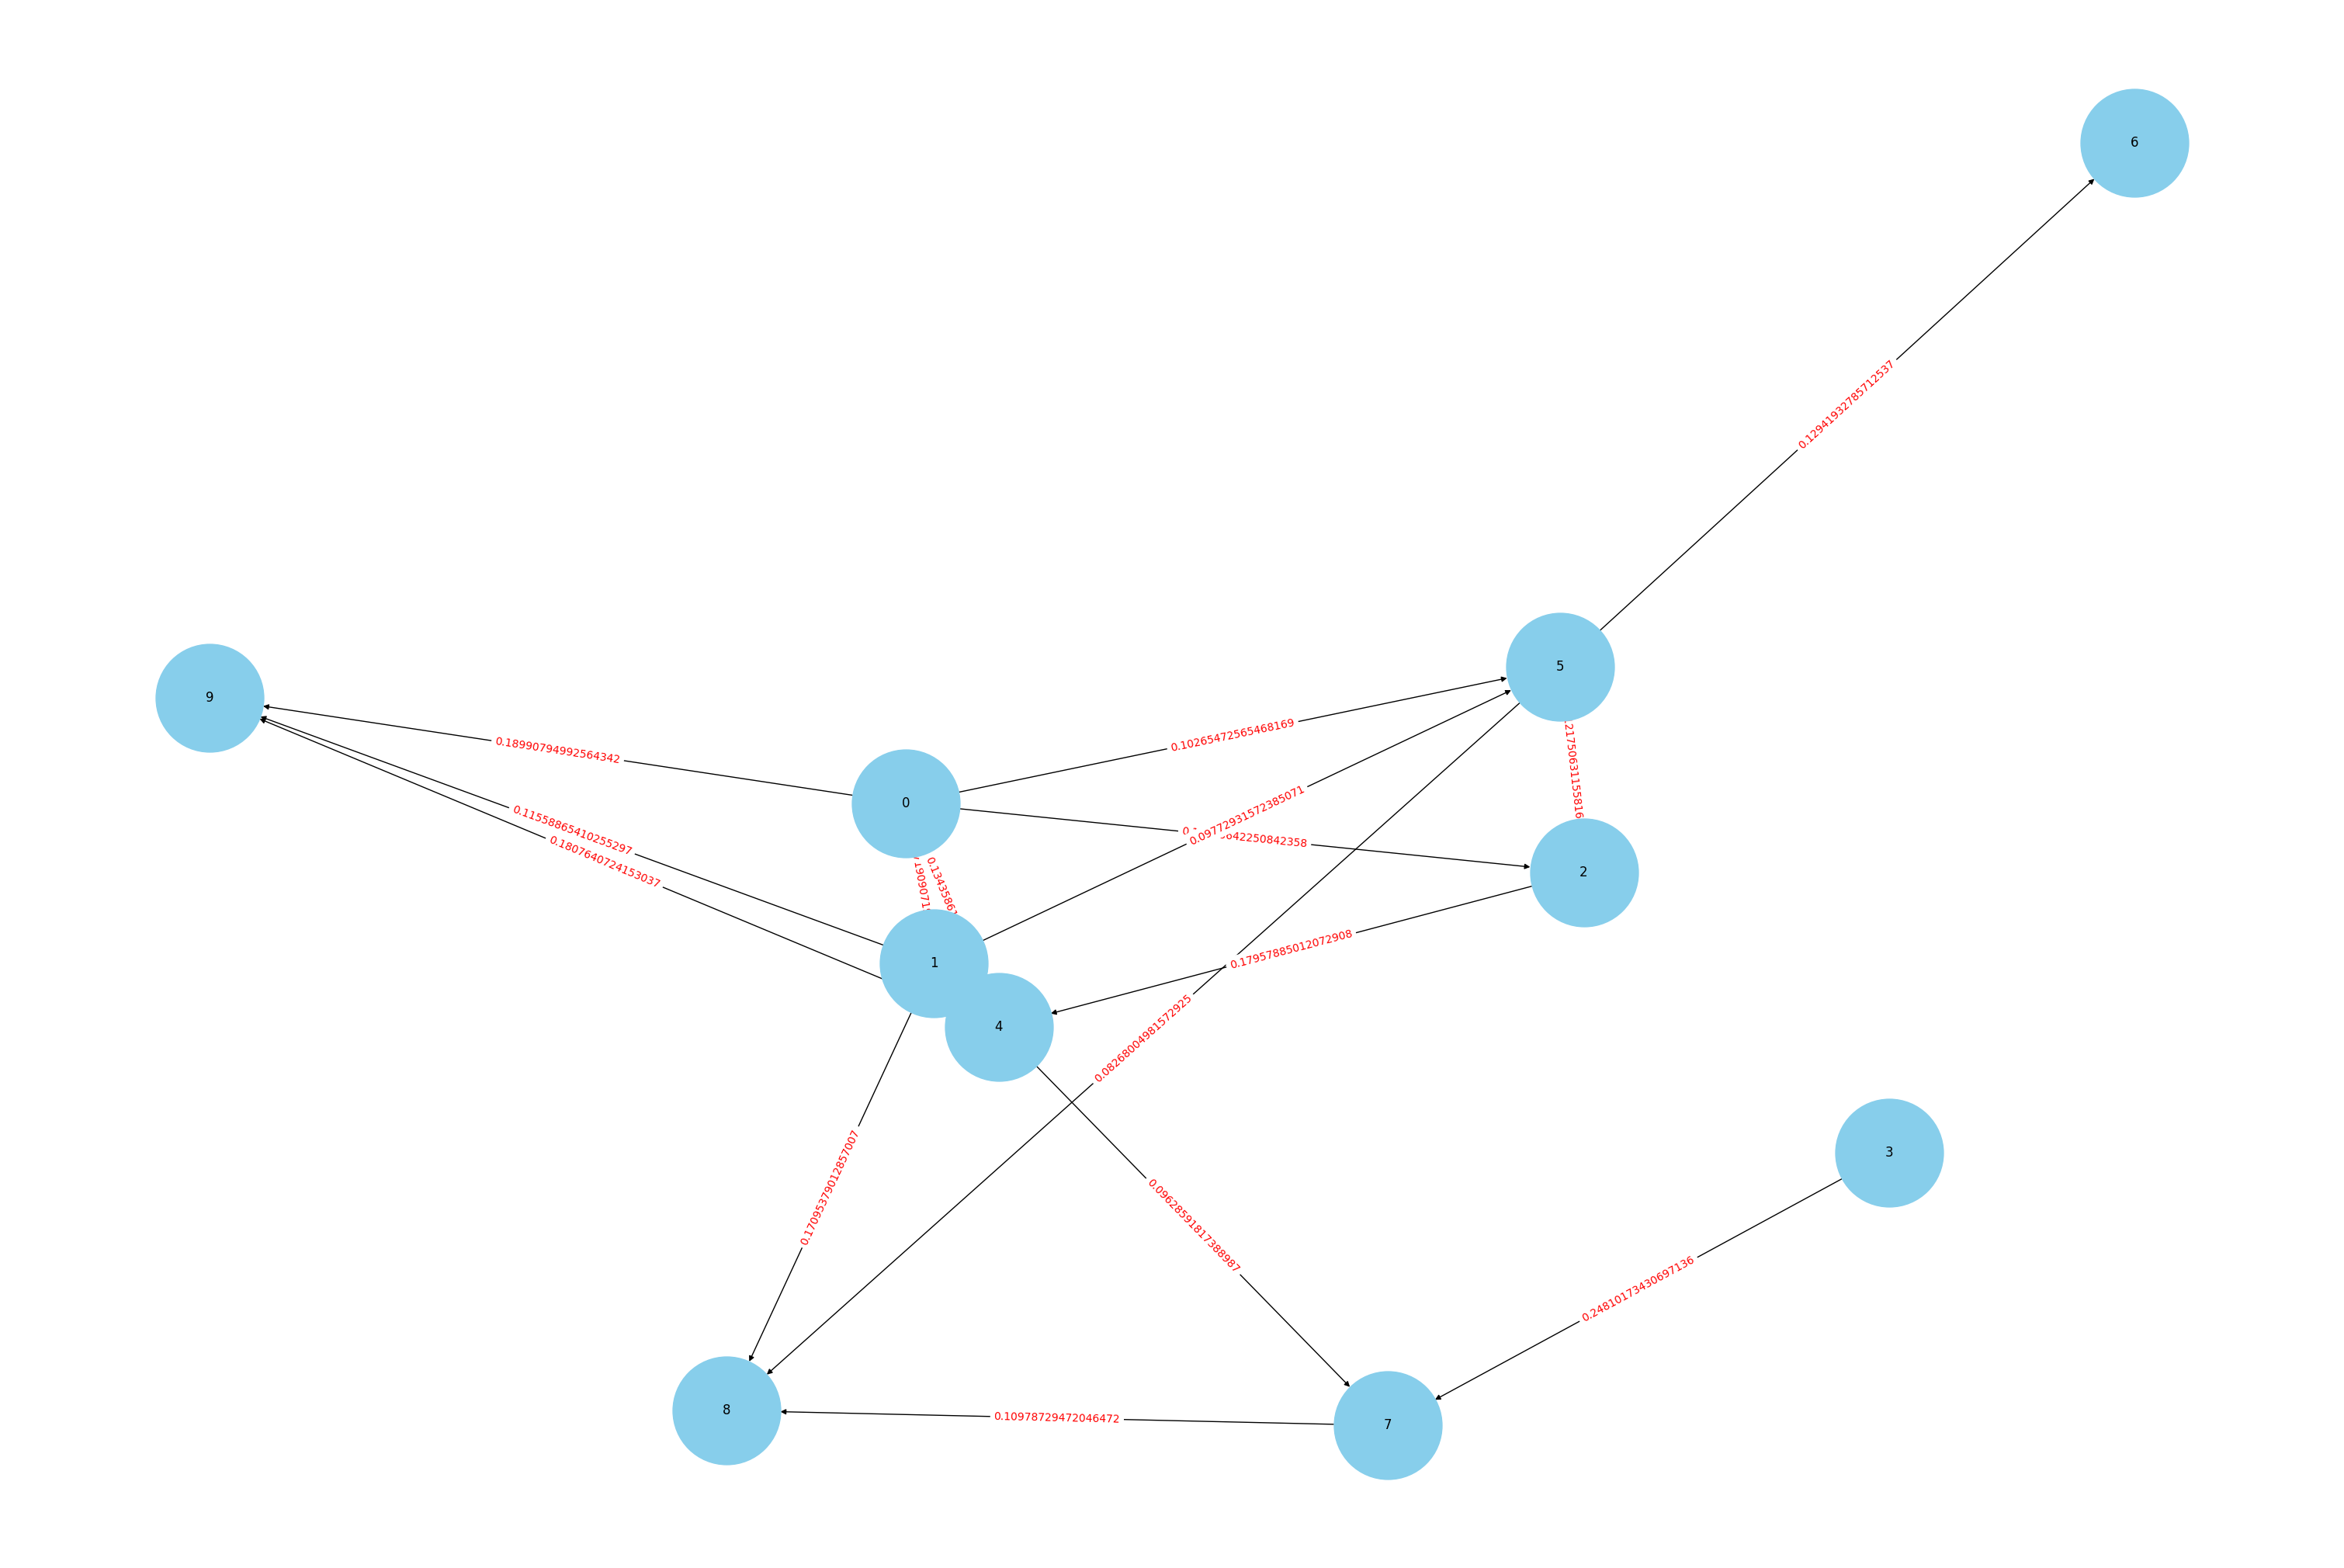



========= document ke-3 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.1111111111111111
Closenes Centrality Node 2 = 0.1111111111111111
Closenes Centrality Node 4 = 0.4444444444444444
Closenes Centrality Node 5 = 0.462962962962963
Closenes Centrality Node 6 = 0.5714285714285714
Closenes Centrality Node 8 = 0.6464646464646464
Closenes Centrality Node 3 = 0.14814814814814814
Closenes Centrality Node 7 = 0.5444444444444444
Closenes Centrality Node 9 = 0.47407407407407404


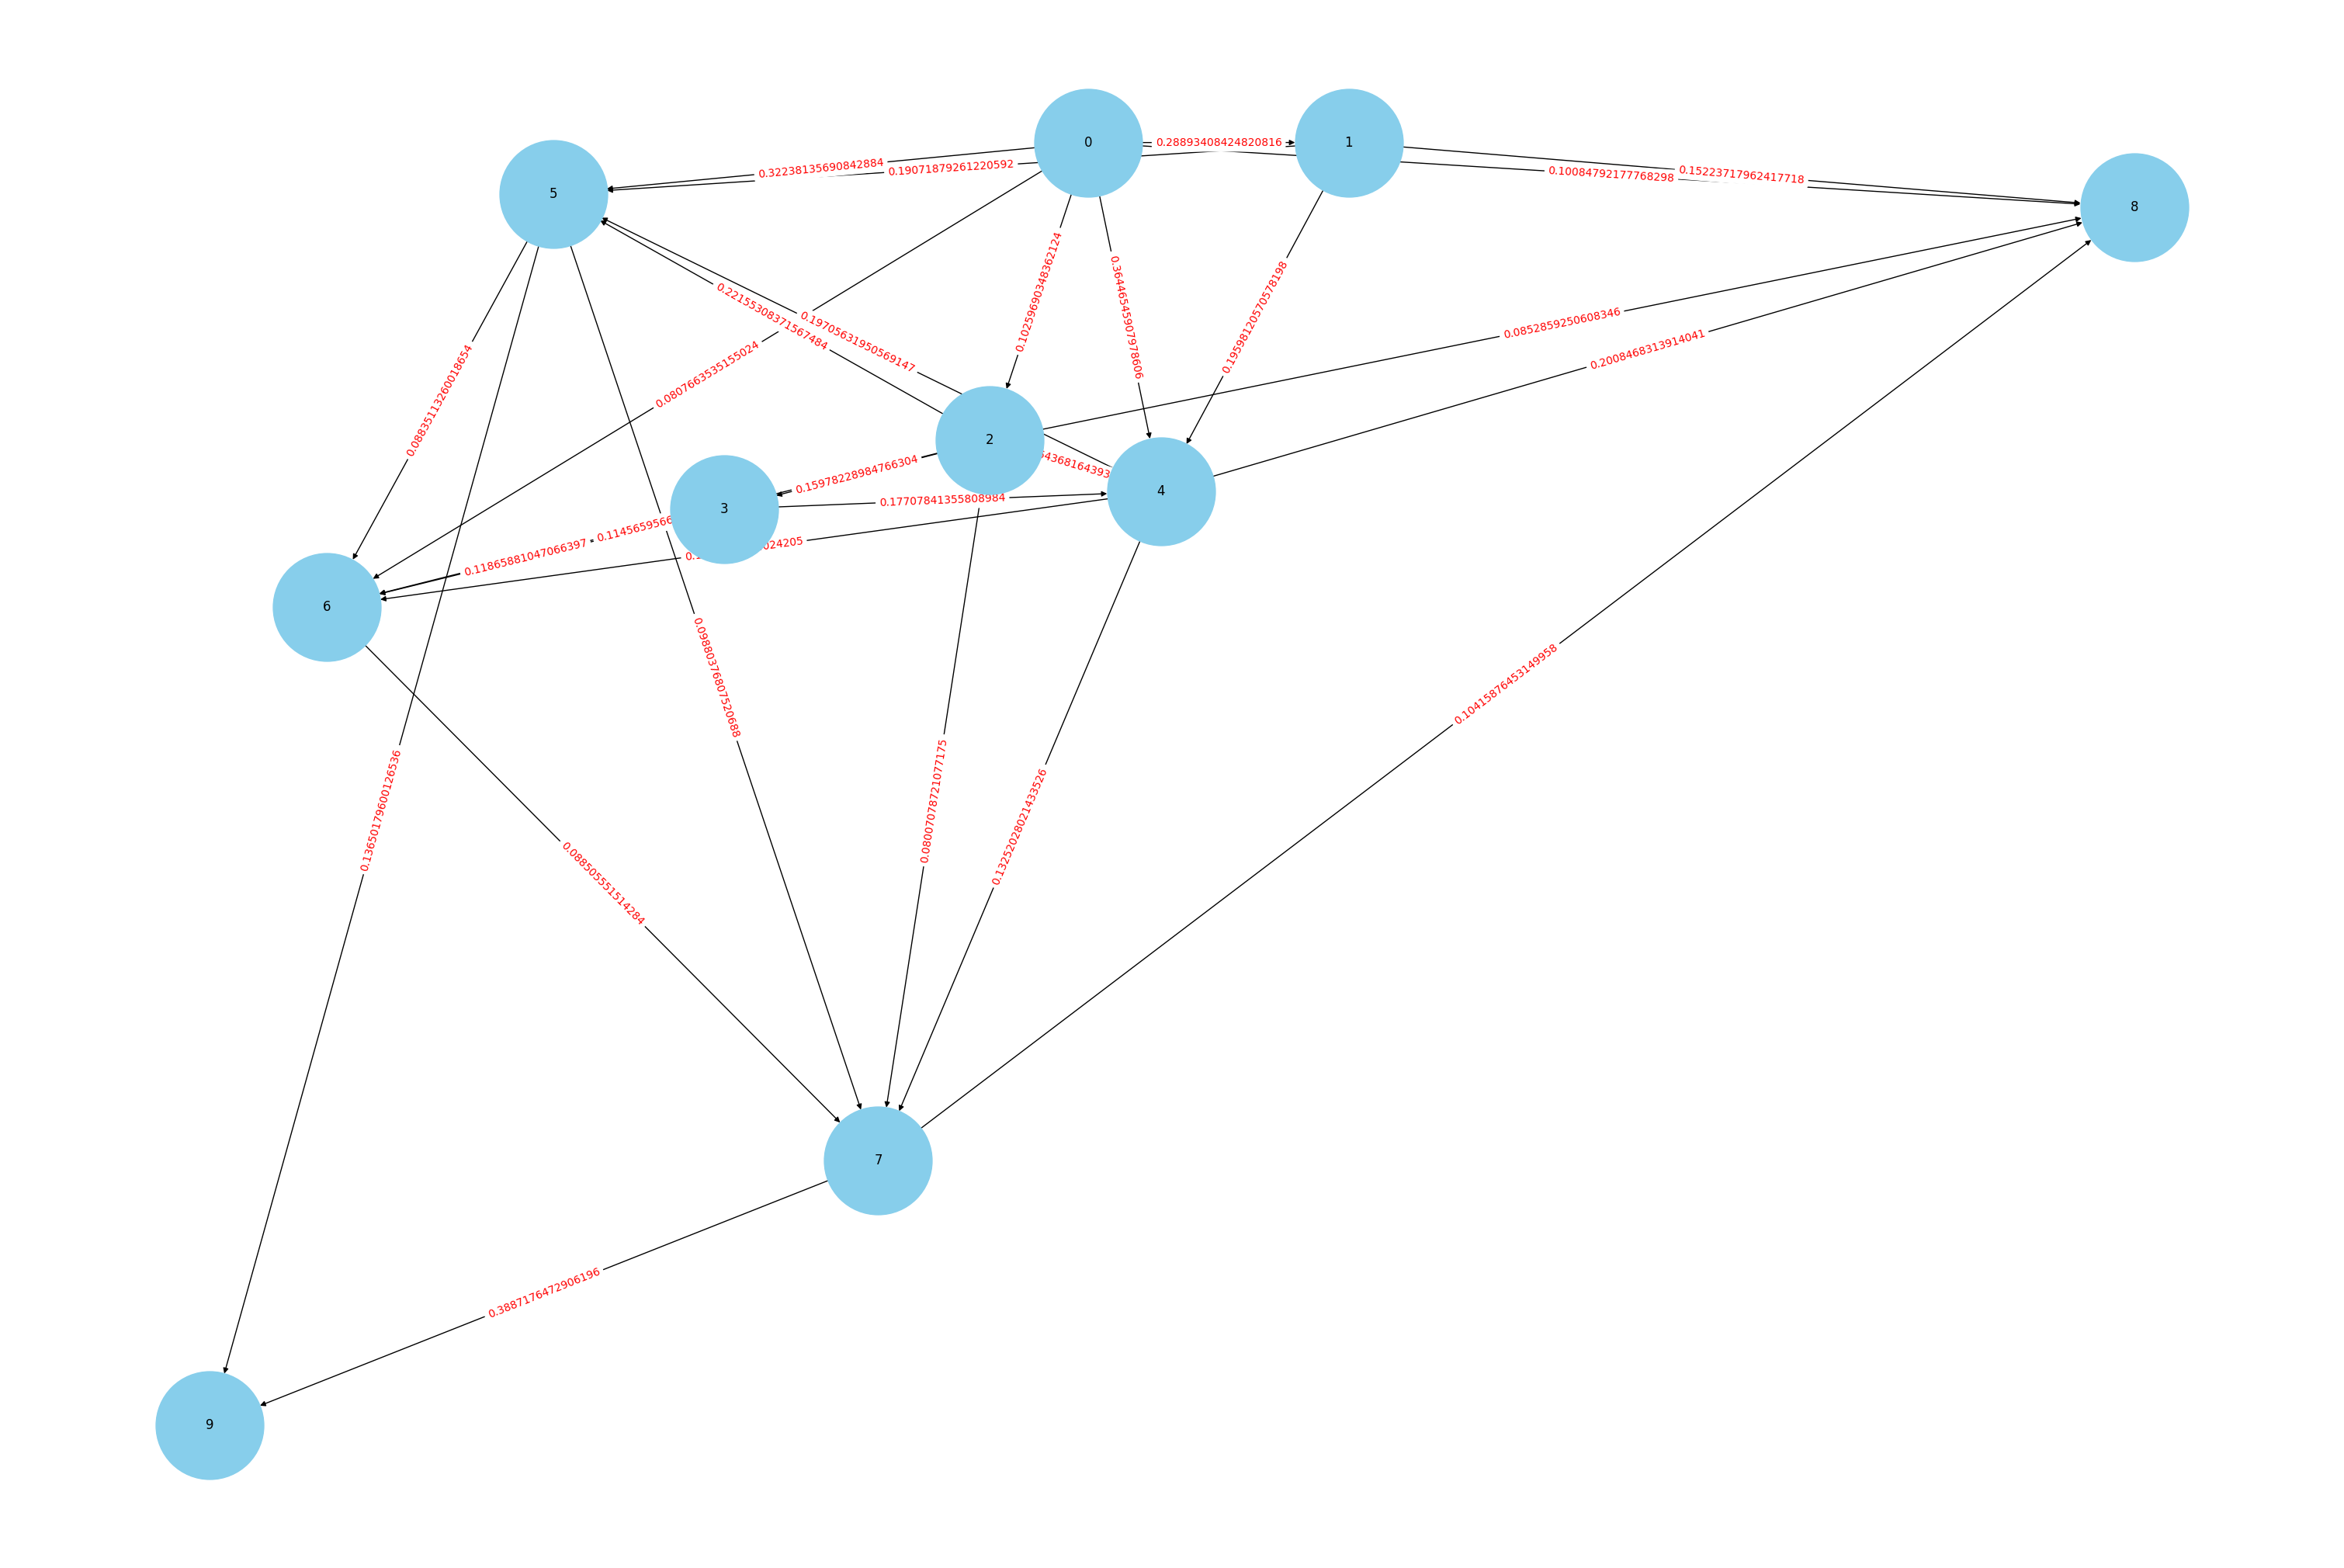

In [ ]:
for i in range(len(graf_result[:4])):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # Menentukan ukuran canvas
  plt.figure(figsize=(30, 20))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  plt.show()


  print('\n')

### Summary
Summary atau ringkasan dalam pemrosesan bahasa alami (Natural Language Processing/NLP) merujuk pada proses merangkum informasi penting atau poin utama dari sebuah teks atau dokumen yang lebih besar menjadi bentuk yang lebih singkat namun mempertahankan esensi atau informasi kunci.

In [ ]:
summary = [] #membuat array kosong untuk hasil summary
for i in range(len(graf_result)): #perulangan setiap graf result

  cc = nx.closeness_centrality(graf_result[i]) #menjadikan closeness centrality pada setiap indeks graf result
  cc = dict(sorted(cc.items(), key=lambda item: item[1], reverse=True)) #mengurutkan hasil closness centrality dari yang value terbesar

  lists = list(cc.keys())[:3] #mengambil indeks 3 kalimat teratas
  # print(cc)
  # print(lists)
  current_summary = [] #menyimpan hasil summary sementara

  for key,value in cc.items():
    # print((data['tokenizing'][i][key]))
    current_summary.append(data['tokenizing'][i][key]) #menambahkan hasil summary setiap kalimat
  summary.append(current_summary) #menambahkan hasil summary setiap dokumen

In [ ]:
# ========== menyimpan summary yang telah diambil ==============

summary_result = [] #membuat list kosong untuk menyimpan hasil summary final
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = " ".join(ex_summary) #menggabungkan setiap kalimat yang ada pada dokumen
  summary_result.append(hasil) #menambahkan ke dalam final summary

In [ ]:
summary_result

['sementara itu, panama kalah 02 dari maroko pada pertandingan pertama grup a. dua gol maroko yang bersarang ke gawang panama dicetak oleh saifdine chlaghmo 16 dan ayman ennair 905. baca juga timnas u17 indonesia vs panama, welber jardim ungkap pesan bima sakti kemenangan itu membuat maroko memimpin klasemen piala dunia u17 2023 grup a dengan nilai tiga. baca juga indonesia tahan ekuador di piala dunia u17 laga berat, hasil kerja keras\xa0 pada laga perdana kontra ekuador, timnas u17 indonesia besutan bima sakti bermain imbang 11. garuda muda sebenarnya bisa unggul lebih dulu pada menit ke22 lewat gol arkhan kaka. namun, ekuador bisa membalas pada menit ke28 melalui gol allen obando. adapun indonesia yang mengoleksi satu poin berada di peringkat kedua. timnas u17 indonesia akan melanjutkan kiprah pada piala dunia u17 2023 dengan menghadapi panama pada matchday kedua grup a. laga indonesia vs panama tersebut bakal digelar di stadion gelora bung tomo, surabaya, pada senin 13112023 pukul 

In [ ]:
dataSummary = pd.DataFrame(summary_result,columns=['Summary'])
dataSummary = pd.concat([dataSummary,data['Category']],axis=1)
dataSummary

,Summary,Category
0,"sementara itu, panama kalah 02 dari maroko pad...",Sports
1,"kalau kita bicara di timnas senior, kita tidak...",Sports
2,"namun, menurut ibrahim, pesepak bola terbaik m...",Sports
3,baca juga piala dunia u17 2023 panama sempat g...,Sports
4,dewa yagesya berhasil menjadi juara bold battl...,Sports
...,...,...
805,"misalnya, motor dengan nomor pelat sekian belu...",Otomotif
806,baca juga ducati kencang karena semua pebalap ...,Otomotif
807,program leasing dengan bunga nol persen sampai...,Otomotif
808,"soal keselamatan, kita sudah siapkan dengan st...",Otomotif


## Save Data

In [ ]:
datassummary = []
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = " ".join(ex_summary)
  datassummary.append({
      'Summary':hasil,
      'Category':data['Category'][i]
  })

In [ ]:
# Menyimpan data dalam bentuk CSV
import csv
csv_filename = 'data_summary_kompas.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Summary', 'Category']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datassummary:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

Data telah disimpan dalam file data_summary_kompas.csv


## Modeling Data Summary

## EDA (Explorasi Data Analysis)
Proses analisis awal yang dilakukan pada dataset untuk memahami karakteristik, pola, dan struktur data sebelum melakukan analisis lebih lanjut atau membangun model.

In [ ]:
datasummary = pd.read_csv("data_summary_kompas.csv")
datasummary

,Summary,Category
0,"sementara itu, panama kalah 02 dari maroko pad...",Sports
1,"kalau kita bicara di timnas senior, kita tidak...",Sports
2,"namun, menurut ibrahim, pesepak bola terbaik m...",Sports
3,baca juga piala dunia u17 2023 panama sempat g...,Sports
4,dewa yagesya berhasil menjadi juara bold battl...,Sports
...,...,...
805,"misalnya, motor dengan nomor pelat sekian belu...",Otomotif
806,baca juga ducati kencang karena semua pebalap ...,Otomotif
807,program leasing dengan bunga nol persen sampai...,Otomotif
808,"soal keselamatan, kita sudah siapkan dengan st...",Otomotif


In [ ]:
datasummary.isna().sum()

Summary     0
Category    0
dtype: int64

In [ ]:
datasummary.duplicated().sum()

0

### Cleaning

In [ ]:
# recruitments punctuation
import string

# membuat kolom baru dengan nama Summary untuk data baru yang dipunctuation
datasummary['summary_clean'] = datasummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()

# Menghilangkan angka dari kolom 'Summary'
datasummary['summary_clean'] = datasummary['summary_clean'].str.replace('\d+', '', regex=True)
datasummary

<ipython-input-27-e9095bfa76de>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  datasummary['summary_clean'] = datasummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()


,Summary,Category,summary_clean
0,"sementara itu, panama kalah 02 dari maroko pad...",Sports,sementara itu panama kalah dari maroko pada p...
1,"kalau kita bicara di timnas senior, kita tidak...",Sports,kalau kita bicara di timnas senior kita tidak ...
2,"namun, menurut ibrahim, pesepak bola terbaik m...",Sports,namun menurut ibrahim pesepak bola terbaik mal...
3,baca juga piala dunia u17 2023 panama sempat g...,Sports,baca juga piala dunia u panama sempat gugup s...
4,dewa yagesya berhasil menjadi juara bold battl...,Sports,dewa yagesya berhasil menjadi juara bold battl...
...,...,...,...
805,"misalnya, motor dengan nomor pelat sekian belu...",Otomotif,misalnya motor dengan nomor pelat sekian belum...
806,baca juga ducati kencang karena semua pebalap ...,Otomotif,baca juga ducati kencang karena semua pebalap ...
807,program leasing dengan bunga nol persen sampai...,Otomotif,program leasing dengan bunga nol persen sampai...
808,"soal keselamatan, kita sudah siapkan dengan st...",Otomotif,soal keselamatan kita sudah siapkan dengan sta...


### Stopwords
Stopwords digunakan untuk menghilangkan kata umum yang sering muncul dalam teks seperti: di, dan, atau, dari, ke, saya.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Abstrak'
for stop_word in stop_words:
  datasummary['summary_stopwords'] = datasummary['summary_clean'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string

datasummary

,Summary,Category,summary_clean,summary_stopwords
0,"sementara itu, panama kalah 02 dari maroko pad...",Sports,sementara itu panama kalah dari maroko pada p...,sementara itu panama kalah dari maroko pada p...
1,"kalau kita bicara di timnas senior, kita tidak...",Sports,kalau kita bicara di timnas senior kita tidak ...,kalau kita bicara di timnas senior kita tidak ...
2,"namun, menurut ibrahim, pesepak bola terbaik m...",Sports,namun menurut ibrahim pesepak bola terbaik mal...,namun menurut ibrahim pesepak bola terbaik mal...
3,baca juga piala dunia u17 2023 panama sempat g...,Sports,baca juga piala dunia u panama sempat gugup s...,baca juga piala dunia u panama sempat gugup s...
4,dewa yagesya berhasil menjadi juara bold battl...,Sports,dewa yagesya berhasil menjadi juara bold battl...,dewa yagesya berhasil menjadi juara bold battl...
...,...,...,...,...
805,"misalnya, motor dengan nomor pelat sekian belu...",Otomotif,misalnya motor dengan nomor pelat sekian belum...,misalnya motor dengan nomor pelat sekian belum...
806,baca juga ducati kencang karena semua pebalap ...,Otomotif,baca juga ducati kencang karena semua pebalap ...,baca juga ducati kencang karena semua pebalap ...
807,program leasing dengan bunga nol persen sampai...,Otomotif,program leasing dengan bunga nol persen sampai...,program leasing dengan bunga nol persen sampai...
808,"soal keselamatan, kita sudah siapkan dengan st...",Otomotif,soal keselamatan kita sudah siapkan dengan sta...,soal keselamatan kita sudah siapkan dengan sta...


### Tokenizing
Tokenizing adalah proses memecah teks atau dokumen menjadi potongan-potongan yang lebih kecil, yang disebut token.

In [ ]:
datasummary['summary_tokens'] = datasummary['summary_stopwords'].apply(word_tokenize)
datasummary

,Summary,Category,summary_clean,summary_stopwords,summary_tokens
0,"sementara itu, panama kalah 02 dari maroko pad...",Sports,sementara itu panama kalah dari maroko pada p...,sementara itu panama kalah dari maroko pada p...,"[sementara, itu, panama, kalah, dari, maroko, ..."
1,"kalau kita bicara di timnas senior, kita tidak...",Sports,kalau kita bicara di timnas senior kita tidak ...,kalau kita bicara di timnas senior kita tidak ...,"[kalau, kita, bicara, di, timnas, senior, kita..."
2,"namun, menurut ibrahim, pesepak bola terbaik m...",Sports,namun menurut ibrahim pesepak bola terbaik mal...,namun menurut ibrahim pesepak bola terbaik mal...,"[namun, menurut, ibrahim, pesepak, bola, terba..."
3,baca juga piala dunia u17 2023 panama sempat g...,Sports,baca juga piala dunia u panama sempat gugup s...,baca juga piala dunia u panama sempat gugup s...,"[baca, juga, piala, dunia, u, panama, sempat, ..."
4,dewa yagesya berhasil menjadi juara bold battl...,Sports,dewa yagesya berhasil menjadi juara bold battl...,dewa yagesya berhasil menjadi juara bold battl...,"[dewa, yagesya, berhasil, menjadi, juara, bold..."
...,...,...,...,...,...
805,"misalnya, motor dengan nomor pelat sekian belu...",Otomotif,misalnya motor dengan nomor pelat sekian belum...,misalnya motor dengan nomor pelat sekian belum...,"[misalnya, motor, dengan, nomor, pelat, sekian..."
806,baca juga ducati kencang karena semua pebalap ...,Otomotif,baca juga ducati kencang karena semua pebalap ...,baca juga ducati kencang karena semua pebalap ...,"[baca, juga, ducati, kencang, karena, semua, p..."
807,program leasing dengan bunga nol persen sampai...,Otomotif,program leasing dengan bunga nol persen sampai...,program leasing dengan bunga nol persen sampai...,"[program, leasing, dengan, bunga, nol, persen,..."
808,"soal keselamatan, kita sudah siapkan dengan st...",Otomotif,soal keselamatan kita sudah siapkan dengan sta...,soal keselamatan kita sudah siapkan dengan sta...,"[soal, keselamatan, kita, sudah, siapkan, deng..."


In [ ]:
# merubah posisi kolom
datasummary = datasummary[['Summary', 'summary_clean', 'summary_stopwords',
            'summary_tokens','Category']]

## Merge
Merupakan proses penggabungan kata yang telah dinormalisasi dijadikan menjadi satu kalimat utuh

In [ ]:
# menggabungkan kata
datasummary['summary_final'] = datasummary['summary_tokens'].apply(lambda x: ' '.join(x))

<ipython-input-32-9538fca829d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasummary['summary_final'] = datasummary['summary_tokens'].apply(lambda x: ' '.join(x))


### TF IDF
metode yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan pengambilan informasi (Information Retrieval) untuk mengukur seberapa penting suatu kata dalam suatu dokumen atau kumpulan dokumen. Tujuannya adalah untuk memberikan bobot yang lebih tinggi kepada kata-kata yang penting dalam representasi teks.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
tfidf_matrix = tfidf_vectorizer.fit_transform(datasummary['summary_final'])

# Membuat DataFrame dari hasil TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
tfidf_df = pd.concat([datasummary['Summary'],tfidf_df,datasummary['Category']],axis=1)
# Cetak DataFrame TF-IDF
tfidf_df

,Summary,0,1,2,3,4,5,6,7,8,...,14571,14572,14573,14574,14575,14576,14577,14578,14579,Category
0,"sementara itu, panama kalah 02 dari maroko pad...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
1,"kalau kita bicara di timnas senior, kita tidak...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
2,"namun, menurut ibrahim, pesepak bola terbaik m...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
3,baca juga piala dunia u17 2023 panama sempat g...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
4,dewa yagesya berhasil menjadi juara bold battl...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,"misalnya, motor dengan nomor pelat sekian belu...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otomotif
806,baca juga ducati kencang karena semua pebalap ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otomotif
807,program leasing dengan bunga nol persen sampai...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otomotif
808,"soal keselamatan, kita sudah siapkan dengan st...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otomotif


## Modeling

In [ ]:
# import library
from sklearn.model_selection import train_test_split

# Bagi data menjadi pelatihan (80%) dan pengujian (20%)
X_tfidf = tfidf_df.iloc[:,1:-1]
# X_tfidf
y_tfidf = tfidf_df["Category"]
# y_tfidf
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)


### Naive Bayes

In [ ]:
# Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_tfidf_train, y_tfidf_train)

y_pred = naive_bayes.predict(X_tfidf_test)

accuracy_naiveBayes = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Naive Bayes: {accuracy_naiveBayes}')

Akurasi model Naive Bayes: 0.9753086419753086


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

# Latih model pada kolom topik tertentu
knn.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred = knn.predict(X_tfidf_test)

accuracy_knn = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model KNN: {accuracy_knn}')

Akurasi model KNN: 0.9567901234567902


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Inisialisasi model Naive Bayes
rf = RandomForestClassifier()

# Latih model pada kolom topik tertentu
rf.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred = rf.predict(X_tfidf_test)

accuracy_rf = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Random Forest: {accuracy_rf}')

Akurasi model Random Forest: 0.9753086419753086


## Visualisasi

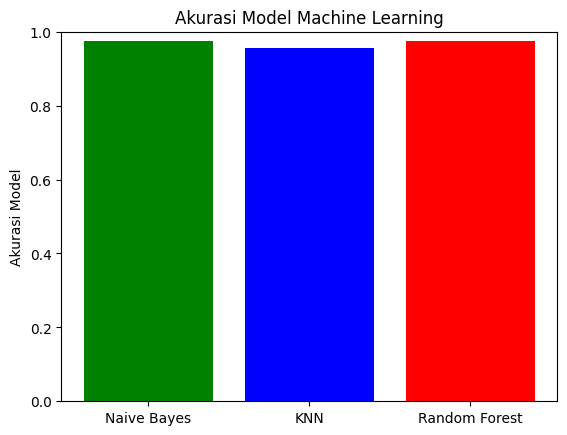

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'KNN', 'Random Forest']
accuracies = [accuracy_naiveBayes, accuracy_knn, accuracy_rf]

plt.bar(models, accuracies, color=[ 'green', 'blue', 'red'])
plt.ylabel('Akurasi Model')
plt.title('Akurasi Model Machine Learning')
plt.ylim(0, 1)  # Sesuaikan dengan rentang akurasi (0-1)
plt.show()